<a href="https://colab.research.google.com/github/1522alisha/Machine-Learning-Lab/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load datasets
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')


In [ ]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
#Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report



In [ ]:
#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')

In [ ]:
# Features (X) & Target (y)
X = df.drop("num", axis=1)
y = df["num"]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Handle Missing Values

# Impute numerical columns with the mean
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

# Impute categorical columns with a placeholder
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna('Unknown', inplace=True)

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipython-input-2165605606.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)
/tmp/ipython-input-2165605606.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [ ]:
# Encode Categorical Features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding:")
print(X_encoded.head())

DataFrame after one-hot encoding:
   id  age  trestbps   chol  thalch  oldpeak   ca  sex_Male  dataset_Hungary  \
0   1   63     145.0  233.0   150.0      2.3  0.0      True            False   
1   2   67     160.0  286.0   108.0      1.5  3.0      True            False   
2   3   67     120.0  229.0   129.0      2.6  2.0      True            False   
3   4   37     130.0  250.0   187.0      3.5  0.0      True            False   
4   5   41     130.0  204.0   172.0      1.4  0.0     False            False   

   dataset_Switzerland  ...  cp_non-anginal  cp_typical angina  fbs_True  \
0                False  ...           False               True      True   
1                False  ...           False              False     False   
2                False  ...           False              False     False   
3                False  ...            True              False     False   
4                False  ...           False              False     False   

   restecg_normal  restecg_s

In [ ]:
# Reload the data to ensure we start with the original DataFrame
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')

# Handle Missing Values

# Impute numerical columns with the mean
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

# Impute categorical columns with a placeholder
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna('Unknown', inplace=True)

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipython-input-1244588419.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)
/tmp/ipython-input-1244588419.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
# Separate features (X) and target (y) after handling missing values
X = df.drop("num", axis=1)
y = df["num"]

# Encode Categorical Features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding:")
display(X_encoded.head())

DataFrame after one-hot encoding:


,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,dataset_Hungary,dataset_Switzerland,...,restecg_normal,restecg_st-t abnormality,exang_True,exang_Unknown,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,150.0,2.3,0.0,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,2,67,160.0,286.0,108.0,1.5,3.0,True,False,False,...,False,False,True,False,False,True,False,False,True,False
2,3,67,120.0,229.0,129.0,2.6,2.0,True,False,False,...,False,False,True,False,False,True,False,False,False,True
3,4,37,130.0,250.0,187.0,3.5,0.0,True,False,False,...,True,False,False,False,True,False,False,False,True,False
4,5,41,130.0,204.0,172.0,1.4,0.0,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
# Train-Test Split on the encoded data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (644, 27)
Shape of X_test: (276, 27)
Shape of y_train: (644,)
Shape of y_test: (276,)


In [ ]:
# Scale Numerical Features
# Identify numerical columns after encoding (excluding the one-hot encoded ones)
numerical_cols_encoded = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train[numerical_cols_encoded] = scaler.fit_transform(X_train[numerical_cols_encoded])

# Transform the test data
X_test[numerical_cols_encoded] = scaler.transform(X_test[numerical_cols_encoded])

print("Scaled X_train head:")
display(X_train.head())
print("Scaled X_test head:")
display(X_test.head())

Scaled X_train head:


,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,dataset_Hungary,dataset_Switzerland,...,restecg_normal,restecg_st-t abnormality,exang_True,exang_Unknown,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
363,-0.371017,-1.167353,-0.634097,0.040741,1.092928,-0.822574,-0.009784,False,True,False,...,True,False,False,False,False,False,False,False,False,False
481,0.070250,0.570605,-0.102728,-0.077398,-0.529168,0.101612,-0.009784,False,True,False,...,True,False,False,False,False,True,False,False,False,False
650,0.702234,0.136115,-0.634097,-1.785866,-1.795195,-0.545318,-0.009784,True,False,True,...,False,True,False,False,False,False,True,False,False,True
483,0.077729,0.570605,-0.102728,1.103990,-0.687422,0.101612,-0.009784,True,True,False,...,True,False,True,False,False,True,False,False,True,False
355,-0.400933,-1.275975,-0.899781,0.131617,-0.014845,-0.822574,-0.009784,False,True,False,...,False,True,False,False,False,False,False,False,False,False


Scaled X_test head:


,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,dataset_Hungary,dataset_Switzerland,...,restecg_normal,restecg_st-t abnormality,exang_True,exang_Unknown,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
319,-0.535557,-1.927710,-0.634097,-0.277325,1.686378,-0.822574,-0.009784,True,True,False,...,True,False,False,False,False,False,False,False,False,False
377,-0.318663,-0.950108,0.428640,0.249756,-0.608295,-0.822574,-0.009784,True,True,False,...,True,False,False,False,False,False,False,False,False,False
538,0.283404,-0.624241,1.491377,1.203953,-1.795195,0.563704,-0.009784,True,True,False,...,True,False,True,False,False,True,False,False,False,False
296,-0.621566,0.570605,1.703924,-0.186449,-1.874322,0.101612,2.358790,True,False,False,...,False,False,False,False,False,True,False,True,False,False
531,0.257228,-1.493220,0.960008,1.776472,-0.291788,1.025797,-0.009784,False,True,False,...,True,False,False,False,False,True,False,True,False,False


Training KNN...
Evaluating KNN...
KNN - Accuracy: 0.6087, Precision: 0.5617, Recall: 0.6087, F1 Score: 0.5778
------------------------------


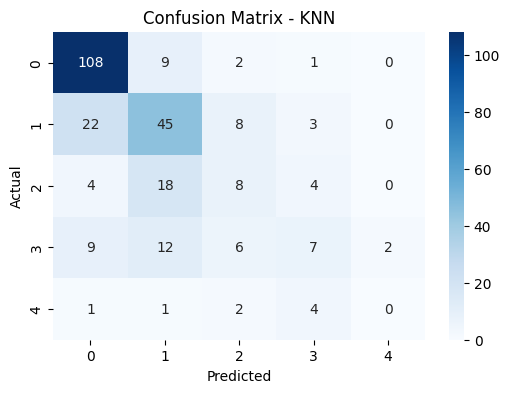

Training Naive Bayes...
Evaluating Naive Bayes...
Naive Bayes - Accuracy: 0.3913, Precision: 0.7678, Recall: 0.3913, F1 Score: 0.4547
------------------------------


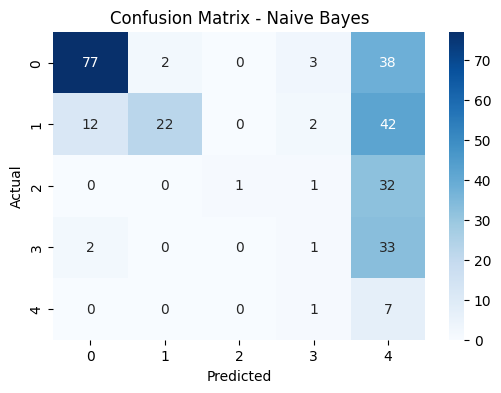

Training Decision Tree...
Evaluating Decision Tree...
Decision Tree - Accuracy: 0.5652, Precision: 0.5549, Recall: 0.5652, F1 Score: 0.5588
------------------------------


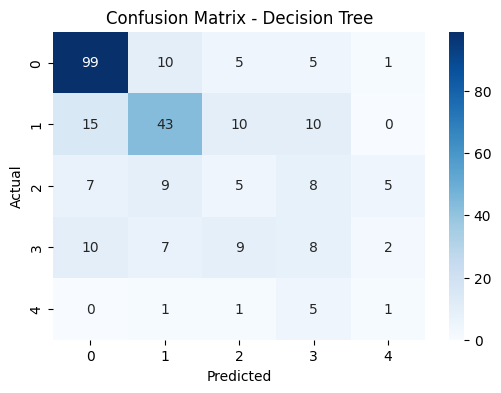

Training Random Forest...
Evaluating Random Forest...
Random Forest - Accuracy: 0.6341, Precision: 0.5900, Recall: 0.6341, F1 Score: 0.6060
------------------------------


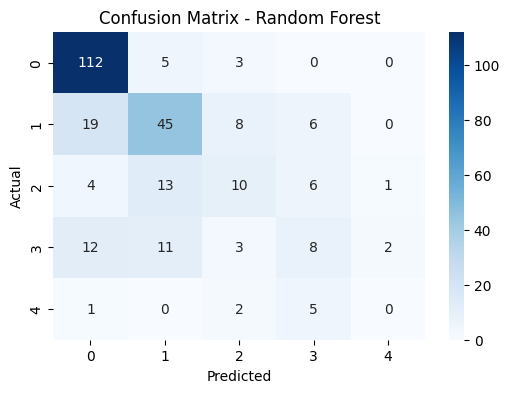


Overall Results:
KNN: Accuracy=0.6087, Precision=0.5617, Recall=0.6087, F1 Score=0.5778
Naive Bayes: Accuracy=0.3913, Precision=0.7678, Recall=0.3913, F1 Score=0.4547
Decision Tree: Accuracy=0.5652, Precision=0.5549, Recall=0.5652, F1 Score=0.5588
Random Forest: Accuracy=0.6341, Precision=0.5900, Recall=0.6341, F1 Score=0.6060


In [ ]:
# Dictionary to store evaluation results
results = {}

# Train and Evaluate Models
# Removed the figure creation for ROC curves as multiclass is not supported directly

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Removed y_prob calculation as standard ROC is not supported for multiclass

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[name] = {"accuracy": acc, "precision": prec, "recall": rec, "f1 Score": f1}

    print(f"{name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    print("-" * 30)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4)) # Create a new figure for each confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Removed ROC Curve plotting section as multiclass is not supported directly


print("\nOverall Results:")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['accuracy']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}, F1 Score={metrics['f1 Score']:.4f}")

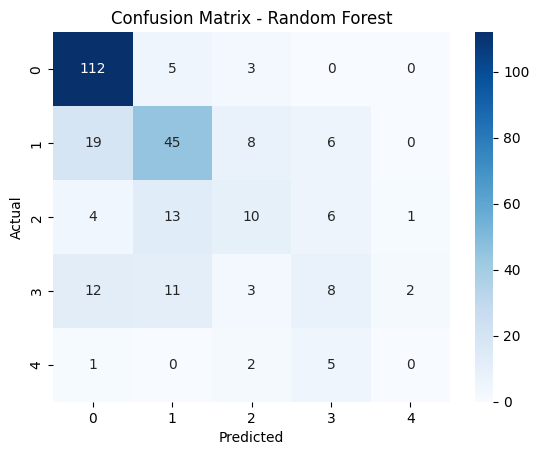

In [ ]:

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

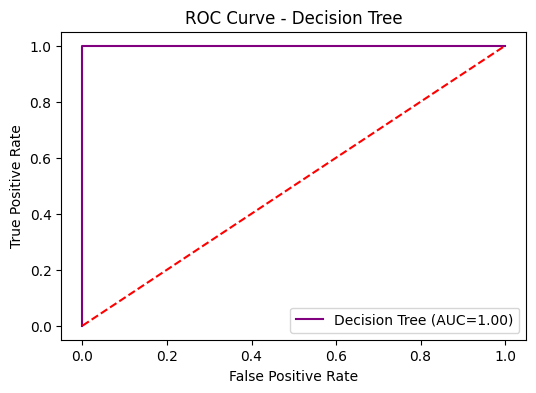

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_test = dt.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={roc_auc:.2f})", color="purple")
plt.plot([0,1],[0,1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

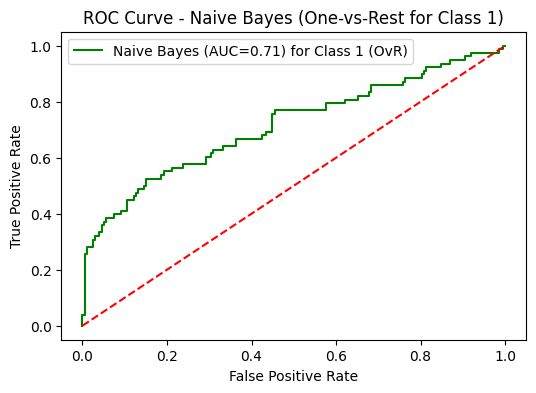

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas

# Reload the original data and split again to get the discrete y_test
# Assuming the original dataframe 'df' and encoded features 'X_encoded' are available
# If not, you might need to re-run previous cells to define them.
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')
# Re-apply the preprocessing steps to get X_encoded and the correct y
# (Handling missing values and one-hot encoding)
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val) # Removed inplace=True and assigned back

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna('Unknown') # Removed inplace=True and assigned back

X = df.drop("num", axis=1)
y = df["num"]
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Split the data to get the correct y_test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


nb = GaussianNB()
nb.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = nb.predict_proba(X_test)[:, 1]

# Binarize the true labels for class 1 (one-vs-rest)
y_test_bin_class_1 = label_binarize(y_test, classes=np.arange(y.nunique()))[:, 1]

# Calculate ROC curve for class 1
fpr, tpr, _ = roc_curve(y_test_bin_class_1, y_prob)
roc_auc = auc(fpr, tpr) # Corrected to use fpr and tpr arrays

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC={roc_auc:.2f}) for Class 1 (OvR)", color="green")
plt.plot([0,1],[0,1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes (One-vs-Rest for Class 1)")
plt.legend()
plt.show()

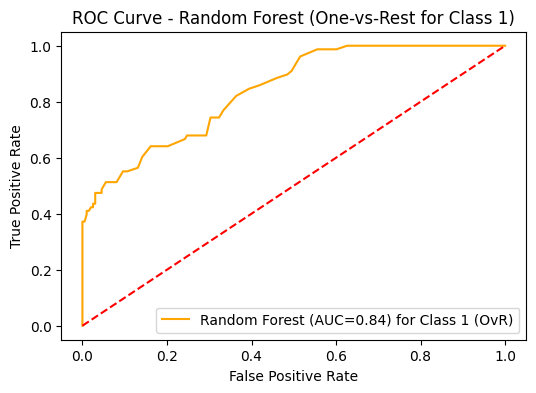

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reload the original data and split again to get the discrete y_test
# Assuming the original dataframe 'df' and encoded features 'X_encoded' are available
# If not, you might need to re-run previous cells to define them.
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')

# Re-apply the preprocessing steps to get X_encoded and the correct y
# (Handling missing values and one-hot encoding)
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna('Unknown')

X = df.drop("num", axis=1)
y = df["num"]
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data to get the correct y_test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = rf.predict_proba(X_test)[:, 1]

# Binarize the true labels for class 1 (one-vs-rest)
y_test_bin_class_1 = label_binarize(y_test, classes=np.arange(y.nunique()))[:, 1]

# Calculate ROC curve for class 1
fpr, tpr, _ = roc_curve(y_test_bin_class_1, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc:.2f}) for Class 1 (OvR)", color="orange")
plt.plot([0,1],[0,1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (One-vs-Rest for Class 1)")
plt.legend()
plt.show()

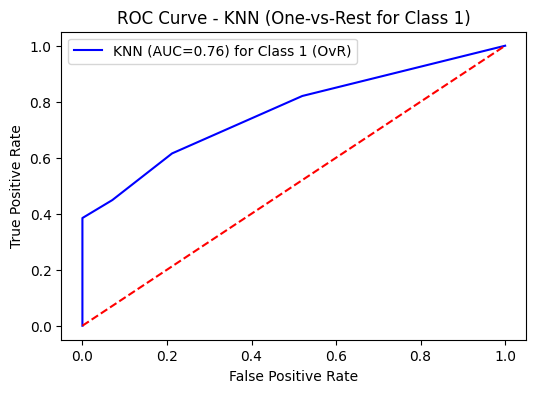

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reload the original data and split again to get the discrete y_test
# Assuming the original dataframe 'df' and encoded features 'X_encoded' are available
# If not, you might need to re-run previous cells to define them.
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')

# Re-apply the preprocessing steps to get X_encoded and the correct y
# (Handling missing values and one-hot encoding)
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna('Unknown')

X = df.drop("num", axis=1)
y = df["num"]
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Split the data to get the correct y_test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = knn.predict_proba(X_test)[:, 1]

# Binarize the true labels for class 1 (one-vs-rest)
y_test_bin_class_1 = label_binarize(y_test, classes=np.arange(y.nunique()))[:, 1]


# Calculate ROC curve for class 1
fpr, tpr, _ = roc_curve(y_test_bin_class_1, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"KNN (AUC={roc_auc:.2f}) for Class 1 (OvR)", color="blue")
plt.plot([0,1],[0,1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN (One-vs-Rest for Class 1)")
plt.legend()
plt.show()

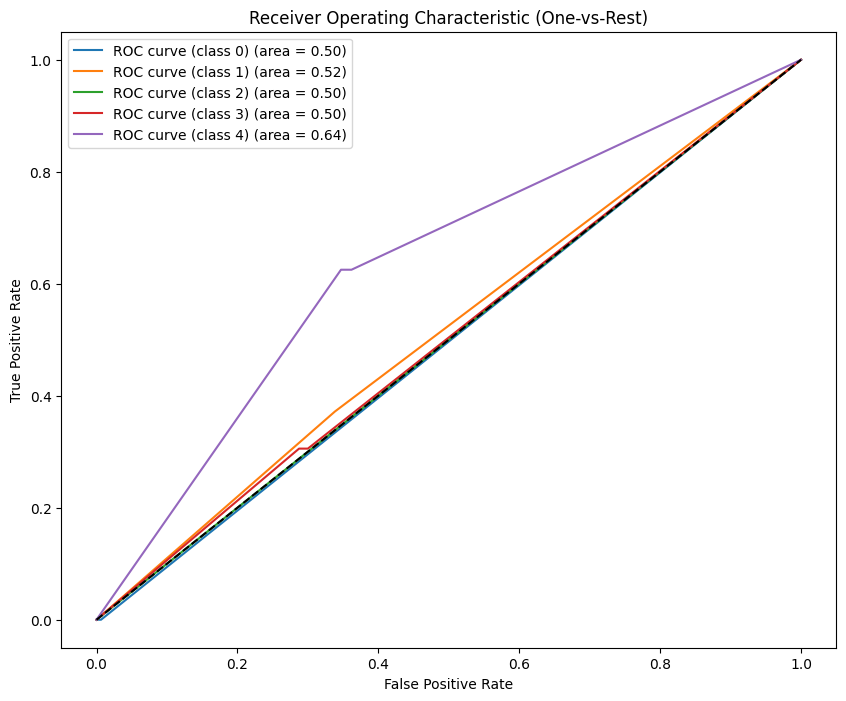

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Reload the original y_test to ensure it has discrete labels
X = df.drop("num", axis=1)
y = df["num"]
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


# Binarize the output for one-vs-rest
n_classes = y.nunique()
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Calculate ROC curves for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming 'knn' model is already trained
# You need to select the probabilities from the model you want to plot
# For example, to plot for Random Forest:
# y_prob_model = models["Random Forest"].predict_proba(X_test)
# Or for Naive Bayes:
y_prob_model = models["Naive Bayes"].predict_proba(X_test)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_model[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (One-vs-Rest)')
plt.legend()
plt.show()